In [6]:
"""O principal objetivo desse projeto de estudo é limpar os dados colocando 
uma traducao em alguns tópicos e adicionando informacoes a dados "NaN"""

import pandas as pd
import matplotlib.pyplot as plt


dados = pd.read_csv('C:/Users/marce/ansel/Desktop/cod/athlete_events.csv')

dados.head(10)



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [7]:
"""Verificando quais as colunas que tem menos informacoes"""
dados.isnull().sum()



ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [9]:
dados = pd.read_csv('C:/Users/marce/ansel/Desktop/cod/athlete_events.csv')

#Decidi remover algumas colunas que não serão úteis
dados.drop(["NOC" , "Year" , "Sport", "Season", ] , axis = 1 , inplace=True)


"""Definindo o "NaN" da coluna medalha como 'Nenhuma', pois os 
atletas não ganharam nenhuma."""
dados.fillna({"Medal": "Nenhuma"}, inplace=True)

"""Comecando o processo de traducao"""
medalha_dadosPTBR = dados.replace(["Gold" , "Silver"], ["Ouro" , "Prata",])


dados_traduzidos = medalha_dadosPTBR.rename(columns={"Name" : "Nome" , "Sex" : "Sexo" , "Age" : "Idade" , "Height" : "Altura", "Weight": "Peso" ,
                      "Team" : "Time" , "Games" : "Jogos/temporada" , "City" : "Cidade" , "Event" : "Eventos" , "Medal" : "Medalha"})

dados_traduzidos.head()


,ID,Nome,Sexo,Idade,Altura,Peso,Time,Jogos/temporada,Cidade,Eventos,Medalha
0,1,A Dijiang,M,24.0,180.0,80.0,China,1992 Summer,Barcelona,Basketball Men's Basketball,Nenhuma
1,2,A Lamusi,M,23.0,170.0,60.0,China,2012 Summer,London,Judo Men's Extra-Lightweight,Nenhuma
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,1920 Summer,Antwerpen,Football Men's Football,Nenhuma
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,1900 Summer,Paris,Tug-Of-War Men's Tug-Of-War,Ouro
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988 Winter,Calgary,Speed Skating Women's 500 metres,Nenhuma


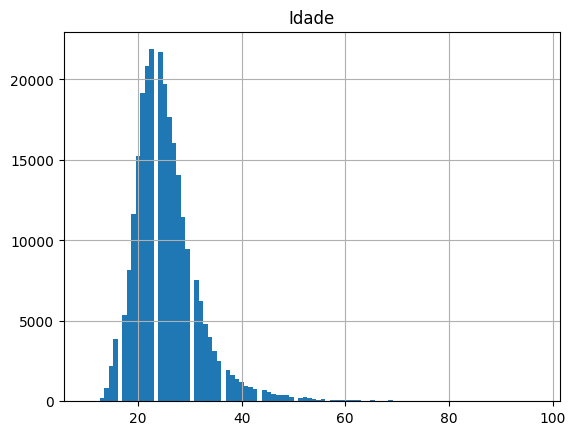

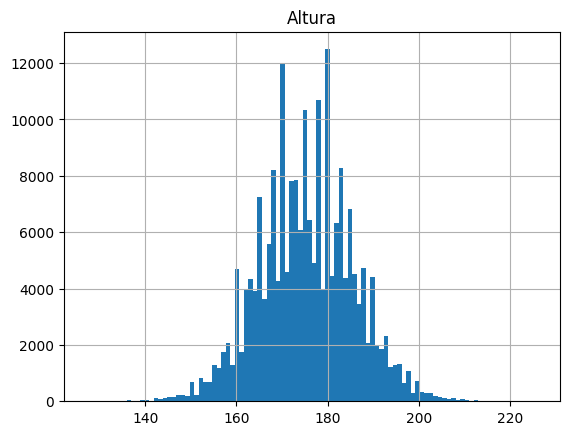

AttributeError: 'DataFrame' object has no attribute 'traduzidos'

In [10]:
"""Depois de ter limpado todos os dados substituindo pela sua traducao ou apagando uma coluna desnecessária,
é hora de descobrir o que vamos fazer em colunas que não temos informacao sobre, como a de 'Altura' e 'Peso'
que obteve muitos 'NaN'"""


"""Como não temos dados exatos sobre a idade e altura dos atletas, decidi fazer uma análise com historograma"""


"""o meu cálculo do historograma funcionou da seguinte forma:
pegamos o minímo e máximo: nesse caso, idades(exemplo). vamos supor que as idades é min 10 e max 90
fazemos o calculo de 90 - 10 = 80, como vou botar 100 colunas, devemos dividir 80 / 100 = 0,8
ou seja, pegamos do ponto min (10) somamos + 0,8 = 10.8, tendo uma variacao de 0,8 em 0,8 anos"""

dados_traduzidos.hist(column= "Idade" , bins = 100)
plt.show()

"""Após analisar, pude ver que de 22 até 26 anos é onde ocorre o maior número presente de idades,
tendo cerca de mais de 210 mil atletas nessa faixa"""

dados_traduzidos.hist(column= "Altura" , bins = 100)
plt.show()

"""Já a altura, conseguimos confirmar que há maior número entre 1.70 até 1.80,
com mais de 10 mil ateltas nessa faixa"""

"""Como não temos um número exato pelo conjunto de dados serem de grande número, optei
por realizar a média e chegar em número aproximado."""

""" dados_traduzidos ["Idade"].fillna(dados_traduzidos["Idade"].mean(), inplace= True)
dados_traduzidos ["Altura"].fillna(dados_traduzidos["Altura"].mean(), inplace= True)
dados_traduzidos ["Peso"].fillna(dados_traduzidos["Peso"].mean(), inplace= True) """
dados.traduzidos.fillna(dados_traduzidos.mean())


dados_traduzidos.head(50)